In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('marketing_campaign.csv', sep='\t')
print(df.shape)

(2240, 29)


In [4]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [12]:
#df.Income.describe()
df.Income=df.Income.fillna(df.Income.median())
df.Income.isna().sum()

np.int64(0)

In [13]:
columns_to_drop = ['ID', 'Z_CostContact','Z_Revenue']
for column in columns_to_drop:
    df.drop(column, inplace=True, axis=1)
    

Column ID is dropped.
Column Z_CostContact is dropped.
Column Z_Revenue is dropped.


In [15]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='str')

In [17]:
df=df.copy()

In [18]:
from datetime import datetime



df['Age']=2022-df['Year_Birth']   

df["Education"]=df["Education"].map({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)  

df['Marital_Status']=df['Marital_Status'].map({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0},inplace=True) 






In [21]:
df['Children']=df['Kidhome']+df['Teenhome']
df['Partner']=df['Marital_Status'].apply(lambda x: 1 if x==1 else 0)

df['Family_Size']=df['Partner']+df['Children']+1

df['Total_Spending']=df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Total_Promo"] =  df["AcceptedCmp1"].astype(int)+ df["AcceptedCmp2"].astype(int)+ df["AcceptedCmp3"].astype(int)+ df["AcceptedCmp4"].astype(int)+ df["AcceptedCmp5"].astype(int)

#df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
today=datetime.today()
#df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df["Parental Status"] = np.where(df["Children"] > 0, 1, 0)

In [23]:
#dropping columns which are already used to create new features
#columns_to_drop = ['Year_Birth','Kidhome','Teenhome']
#df.drop(columns = columns_to_drop, axis = 1, inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)
df = df[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total_Promo","NumWebVisitsMonth"]]

In [24]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2240 non-null   int64  
 1   Education           2240 non-null   int64  
 2   Marital Status      2240 non-null   int64  
 3   Parental Status     2240 non-null   int64  
 4   Children            2240 non-null   int64  
 5   Income              2240 non-null   float64
 6   Total_Spending      2240 non-null   int64  
 7   Recency             2240 non-null   int64  
 8   Wines               2240 non-null   int64  
 9   Fruits              2240 non-null   int64  
 10  Meat                2240 non-null   int64  
 11  Fish                2240 non-null   int64  
 12  Sweets              2240 non-null   int64  
 13  Gold                2240 non-null   int64  
 14  Web                 2240 non-null   int64  
 15  Catalog             2240 non-null   int64  
 16  Store            

In [25]:
#Numeric Features

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 20


In [26]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 0


In [27]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 10


In [28]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 10


OUTLIERS:>>>

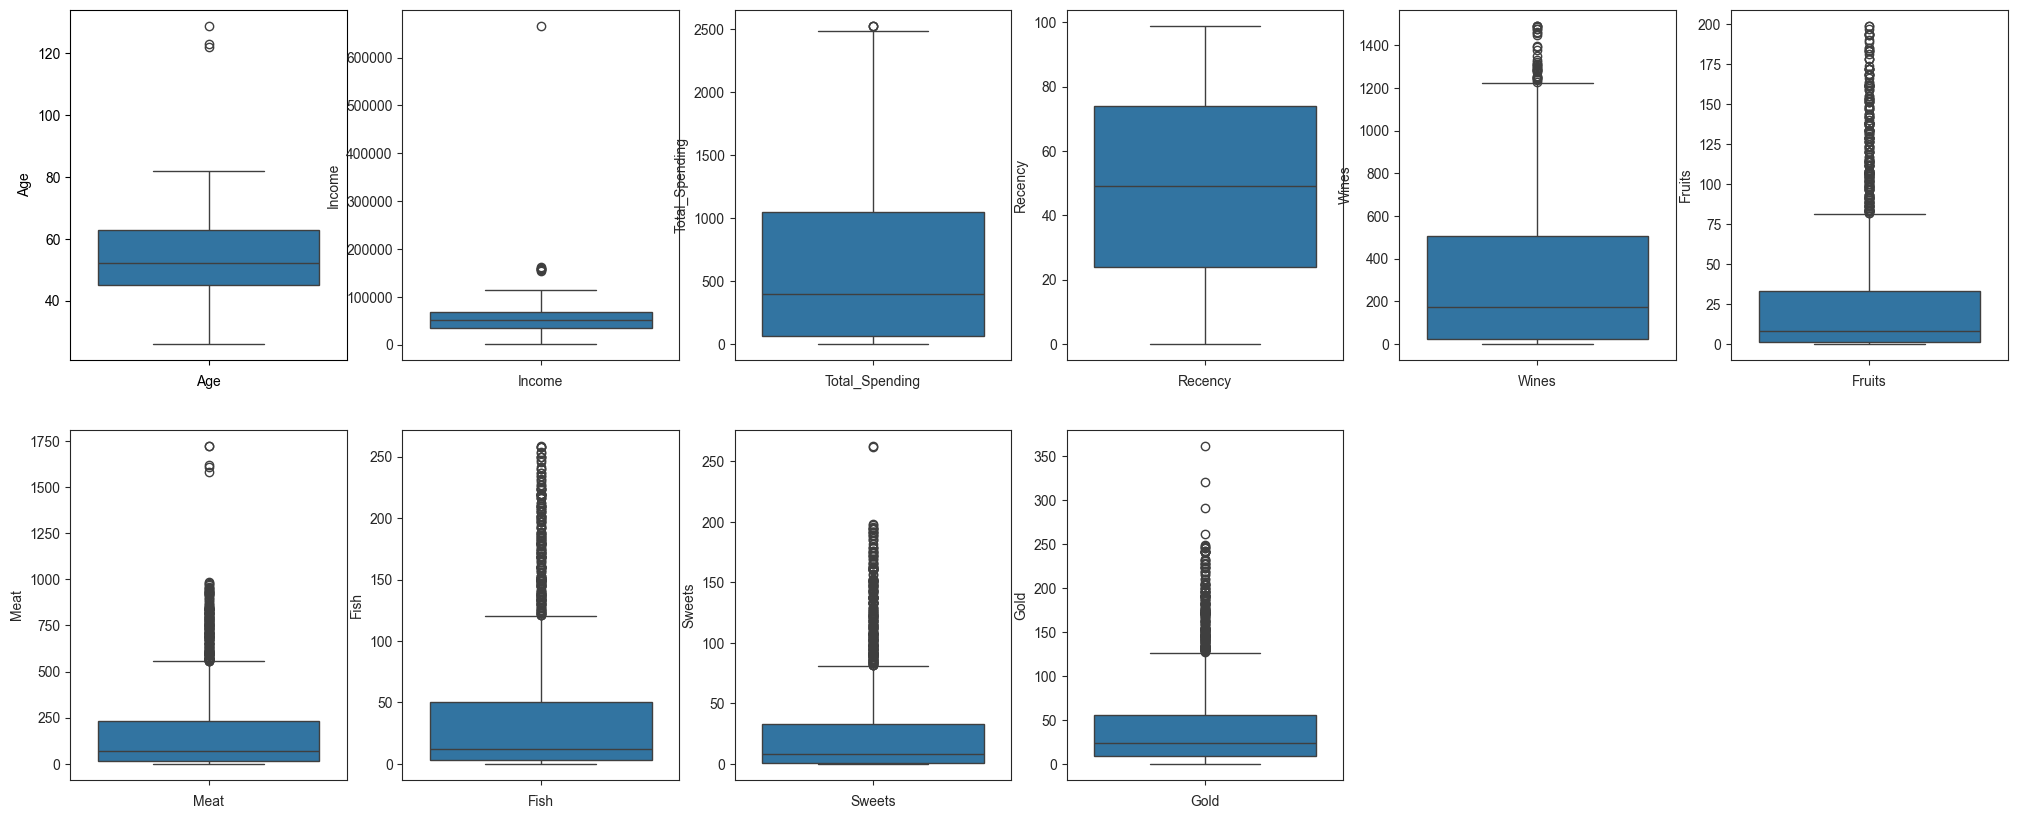

In [29]:
cont_features = continuous_features.copy()
plt.figure(figsize=(25, 10))

for i in range(len(cont_features)):
        plt.subplot(2,6,i+1)
        sns.set_style('ticks')
        plt.xlabel(cont_features[i])
        ax = sns.boxplot(df[cont_features[i]])

report

We can see, there are no such outliers in Recency Column
But there are outliers in following columns -
Income
Wines
Fruits
Meat
Fish
Sweets
Gold
Age
Total Spending

In [31]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [32]:
for col in continuous_features:
         detect_outliers(col)


 #### Age ####
percentile25 45.0
percentile75 63.0
Upper limit 90.0
Lower limit 18.0

 #### Income ####
percentile25 35538.75
percentile75 68289.75
Upper limit 117416.25
Lower limit -13587.75

 #### Total_Spending ####
percentile25 68.75
percentile75 1045.5
Upper limit 2510.625
Lower limit -1396.375


TypeError: Invalid value '2510.625' for dtype 'int64'

In [33]:
df[continuous_features].skew(axis=0, skipna=True)

Age               0.120199
Income            0.090027
Total_Spending    0.860841
Recency          -0.001987
Wines             1.175771
Fruits            2.102063
Meat              2.083233
Fish              1.919769
Sweets            2.136081
Gold              1.886106
dtype: float64

scaling

In [35]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
outlier_features = ["Wines","Fruits","Meat","Fish","Sweets","Gold","Age","Total_Spending"] 
numeric_features = [x for x in numeric_features if x not in outlier_features]
numeric_features

['Education',
 'Marital Status',
 'Parental Status',
 'Children',
 'Income',
 'Recency',
 'Web',
 'Catalog',
 'Store',
 'Discount Purchases',
 'Total_Promo',
 'NumWebVisitsMonth']

In [37]:
%pip install scikit-learn

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline




dataC = df.copy()

numeric_pipeline = Pipeline(steps=
                            [("Imputer", SimpleImputer(strategy='constant', fill_value=0)), 
                             ("StandardScaler", StandardScaler())]
                           )

outlier_features_pipeline = Pipeline(steps=
                                     [("Imputer", SimpleImputer(strategy='constant', fill_value=0)),
                                      ("transformer", PowerTransformer(standardize=True))]
                                    )

preprocessor = ColumnTransformer(
    [
        ("numeric pipeline",numeric_pipeline, numeric_features),
        ("Outliers Features Pipeline", outlier_features_pipeline, outlier_features)
    ]
)

columns = dataC.columns
dataC = preprocessor.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns= columns )
print("After scaling, let's have a glimpse of the scaled dataset :")
scaled_data.head()


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\KIIT0001\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB 660.6 kB/s eta 0:00:13
    --------------------------------------- 0.1/8.1 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.3/8.1 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/8.1 MB 4.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/8.1 MB 6.2 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.1 MB 7.1 MB/s eta 0:00:01
   ------------ --------------------------- 2.6/8.1 MB 8.4 MB/s eta 0:00:01
   -------------- ------------------------- 3.0/8.1 MB 8.7 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.1 MB 9.5 MB/s eta 0:00:01
   ---------------------- ----------------- 4.6/8.1 MB 10.2 MB/s eta 0:00:01
   -------------------------- ------------- 5.4/8.1 MB 10.9 MB/s eta 0:00:01
   -----------

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total_Promo,NumWebVisitsMonth
0,-0.458383,-1.346874,-1.584605,-1.264505,0.299651,0.307039,1.409304,2.510890,-0.550785,0.349414,-0.439037,0.693904,1.058416,1.409083,1.419915,1.604124,1.388058,1.089796,1.005341,1.315325
1,-0.458383,-1.346874,0.631072,1.396361,-0.263808,-0.383664,-1.110409,-0.568720,-1.166125,-0.168236,-0.439037,-0.130463,-1.210647,-0.985243,-1.377137,-0.870963,-0.970318,-0.937974,1.239521,-1.441421
2,-0.458383,0.742460,-1.584605,-1.264505,0.943420,-0.798086,1.409304,-0.226541,1.295237,-0.685887,-0.439037,-0.542647,0.746538,1.063780,0.446761,1.329883,0.553437,0.448772,0.361223,0.661160
3,-0.458383,0.742460,0.631072,0.065928,-1.204881,-0.798086,-0.750450,-0.910898,-0.550785,-0.168236,-0.439037,0.281720,-1.210647,-0.380348,-0.706341,-0.097653,-0.517532,-1.043096,-1.315014,-1.117205
4,1.533425,0.742460,0.631072,0.065928,0.307056,1.550305,0.329427,0.115638,0.064556,1.384715,-0.439037,-0.130463,0.124254,0.986362,0.399025,0.788635,0.700187,-0.341747,-1.033428,0.179327


In [38]:
# this function we take it from sklearn page for ploting silhouette with little Modification 
#ploting silhouette_plot aside with clustring results in PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from matplotlib import cm

def silhouette_plot(model,range_n_clusters,X_clustering,pca,**kwargs):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_clustering) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = model(n_clusters,**kwargs)
        cluster_labels = clusterer.fit_predict(X_clustering)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_clustering, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_clustering, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
    #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        sns.scatterplot(
            x = pca[:, 0],
            y = pca[:, 1],
            hue=cluster_labels,
            palette=sns.color_palette("colorblind", len(set(cluster_labels))),
            alpha=0.7,
            legend="full",
            ax = ax2
        )
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            f"Silhouette analysis for {model.__name__} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()


In [39]:
#Applying PCA
from sklearn.decomposition import PCA
df_scaled = scaled_data.copy()
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [40]:
# apply PCA and display clustering metrics
from sklearn.cluster import KMeans
for y in range(2, 8):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(df_scaled)
    for x in range(2, 7):
        kmeans = KMeans(n_clusters = x,)
        label = kmeans.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '-  Inertia: ',kmeans.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.5278922753948566 -  Inertia:  8916.371312732668
Silhouette-Score for 3 Clusters:  0.5062816552631971 -  Inertia:  5060.782289907486
Silhouette-Score for 4 Clusters:  0.44859928223038503 -  Inertia:  3971.494197788318
Silhouette-Score for 5 Clusters:  0.43103182474247576 -  Inertia:  3260.7356623593455
Silhouette-Score for 6 Clusters:  0.41124946253699424 -  Inertia:  2816.0115389060707

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.4589519552573381 -  Inertia:  12329.311482517296
Silhouette-Score for 3 Clusters:  0.41509795036603725 -  Inertia:  8374.45783900868
Silhouette-Score for 4 Clusters:  0.35764550049183386 -  Inertia:  7154.303305927497
Silhouette-Score for 5 Clusters:  0.3267139931434517 -  Inertia:  5934.577290208627
Silhouette-Score for 6 Clusters:  0.3214232113407632 -  Inertia:  5401.684861597207

PCA with # of components:  4
Silhouette-Score for 2 Clusters:  0.42185405446103535 -  Inertia

WE ARE GETTING BEST SIlHOUTTE SCORE FOR N-components=2 and N_cluster=2

In [41]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=2,random_state=42).fit(df_scaled)

reduced=pca_final.fit_transform(df_scaled)
pcadf = pd.DataFrame(reduced) 
pcadf.columns = ['PC1', 'PC2'] 
  
pcadf.head(10)

,PC1,PC2
0,3.987546,-0.058324
1,-3.417774,-0.149022
2,2.979487,-0.815157
3,-2.718890,-1.004929
4,0.787269,1.059537
5,1.083773,1.185691
6,1.405495,0.949307
7,-1.844975,0.357529
8,-3.451385,-0.187479
9,-5.182003,1.640039


#ELBOW METHOD TO DETERMINE THE VALUE OF K FOR KMEANS

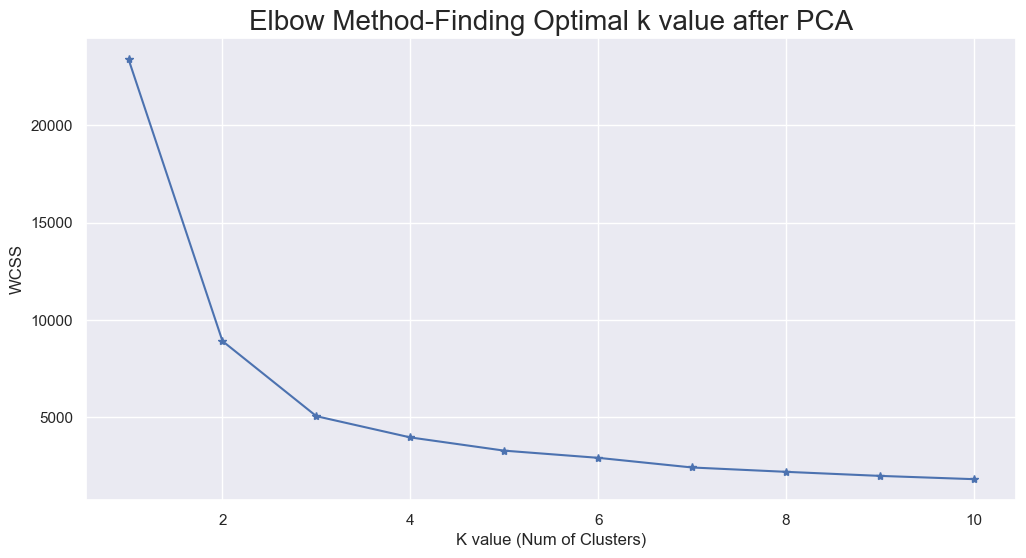

In [42]:
wcss= {}
sns.set()
plt.figure(figsize=(12,6))
for i in range(1,11): 
    km = KMeans(n_clusters=i)
    km.fit(pcadf)
    wcss[i]=km.inertia_

plt.plot(range(1,11),wcss.values(), marker='*')
plt.title('Elbow Method-Finding Optimal k value after PCA', fontsize =20)
plt.xlabel('K value (Num of Clusters)')
plt.ylabel('WCSS')
plt.show()

Here the optimum number of cluster is 3 cluster since it is the place where the graph start to flatten out meaning that having higher number of cluster will not yield a much more fitting machine.

For n_clusters = 3 The average silhouette_score is : 0.5077761335313322
For n_clusters = 4 The average silhouette_score is : 0.44859928223038503
For n_clusters = 5 The average silhouette_score is : 0.43493936944141026
For n_clusters = 6 The average silhouette_score is : 0.3936987920723084


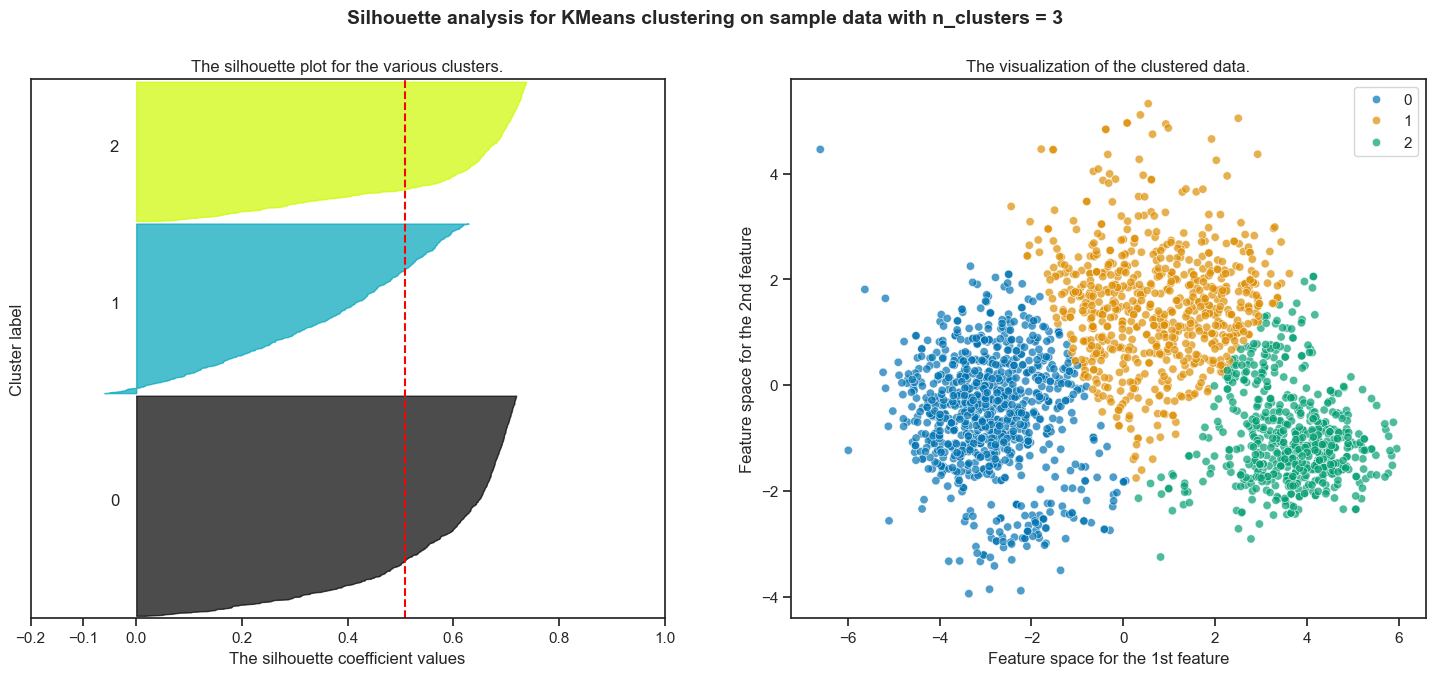

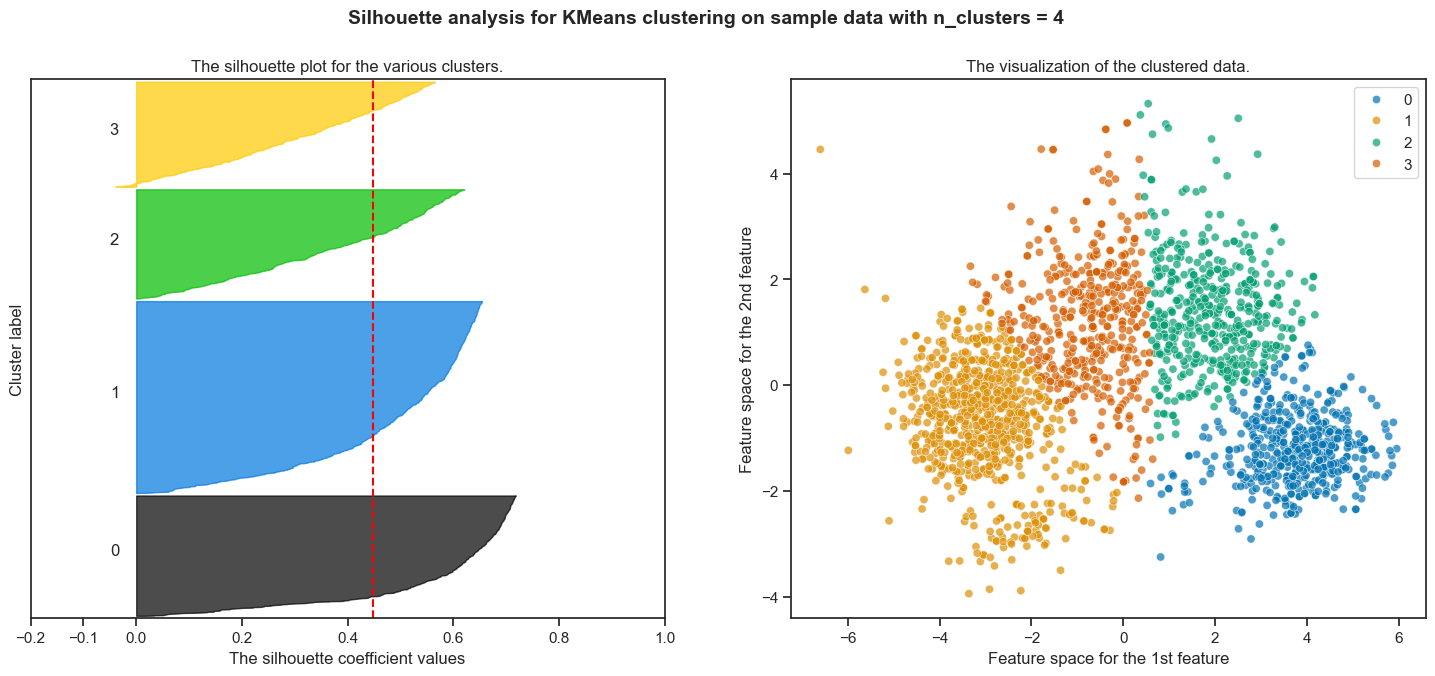

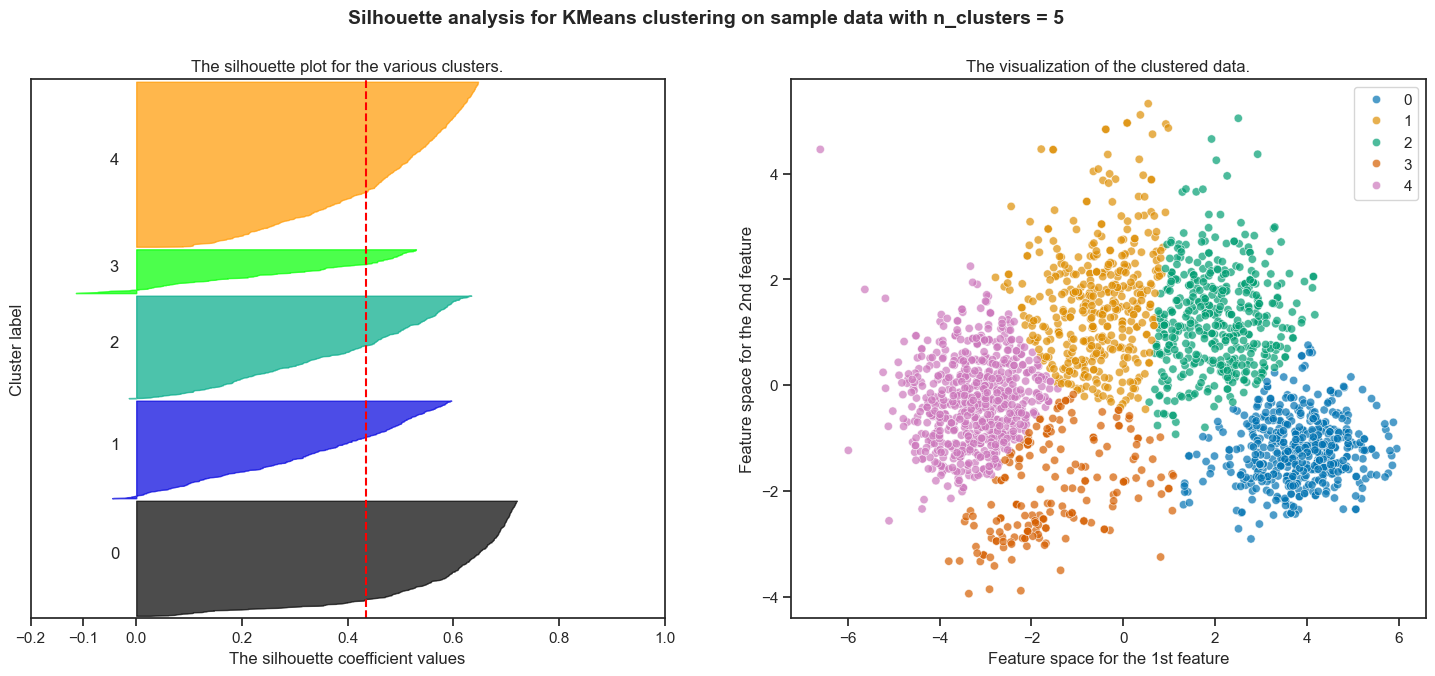

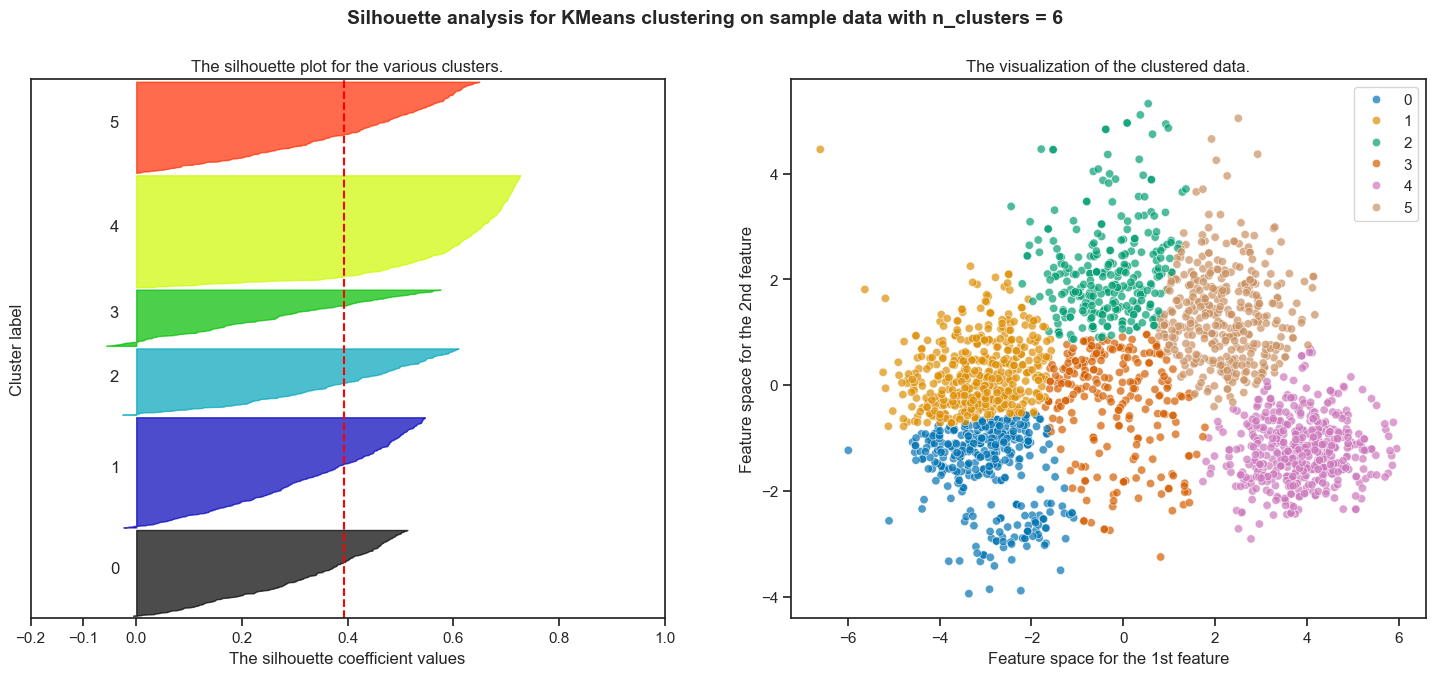

In [43]:
sns.set_style('ticks')
silhouette_plot(KMeans,range(3,7), pcadf, reduced)

In [44]:
# Fitting the model to reduced data
model = KMeans(n_clusters=3).fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_

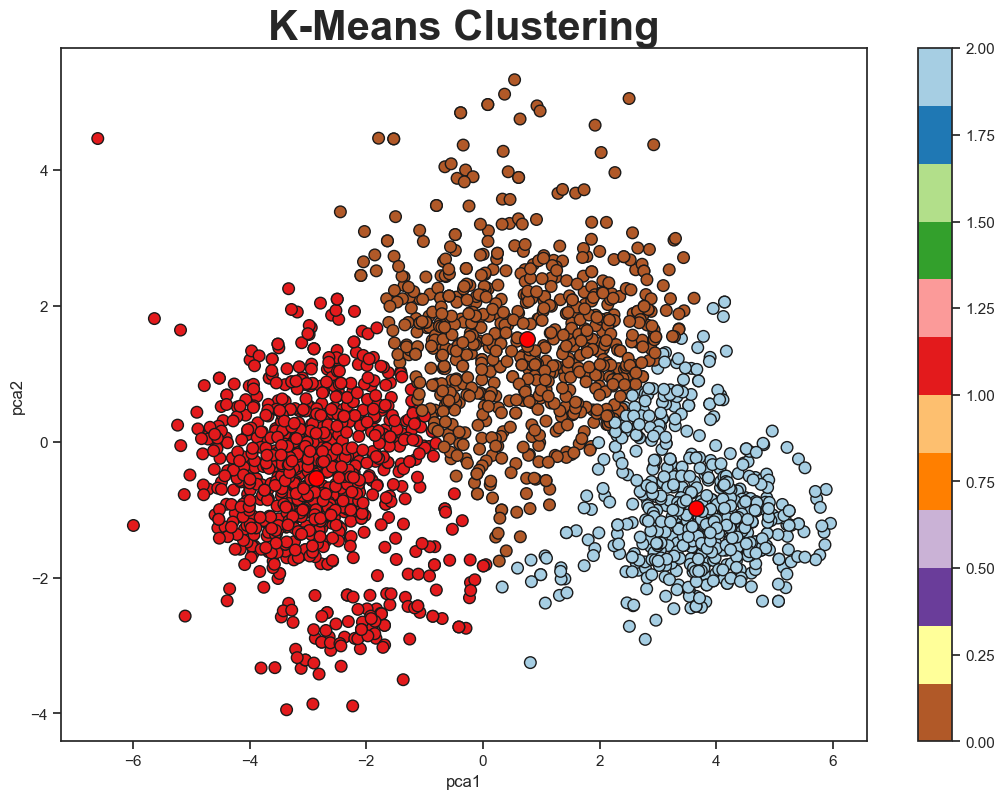

In [45]:
#Plotting the clusters
plt.figure(figsize=(13,9))
plt.title('K-Means Clustering', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=70, cmap='Paired_r', ec='k')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='.',s=500, ec='k');

For n_clusters = 3 The average silhouette_score is : 0.4794252215796355
For n_clusters = 4 The average silhouette_score is : 0.4433009596814899
For n_clusters = 5 The average silhouette_score is : 0.4285776947225702
For n_clusters = 6 The average silhouette_score is : 0.4189163864096897
For n_clusters = 7 The average silhouette_score is : 0.36956432974243214


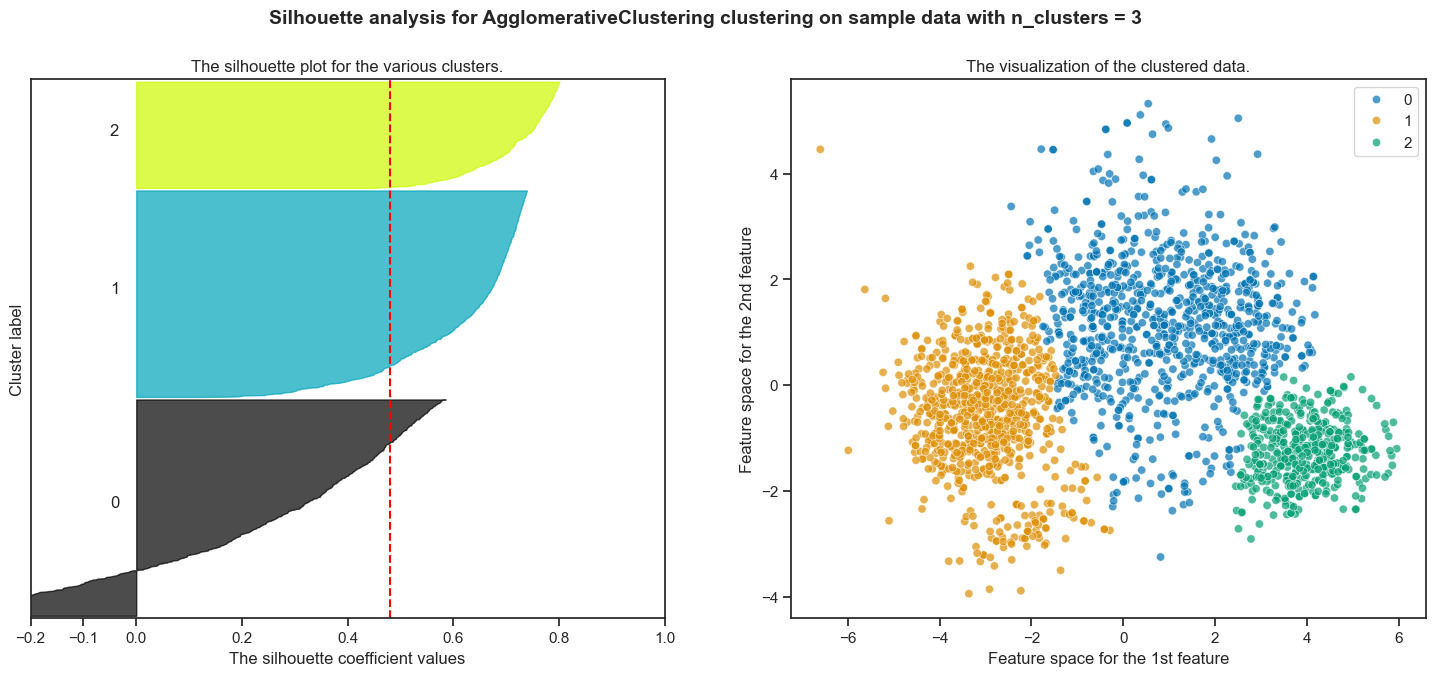

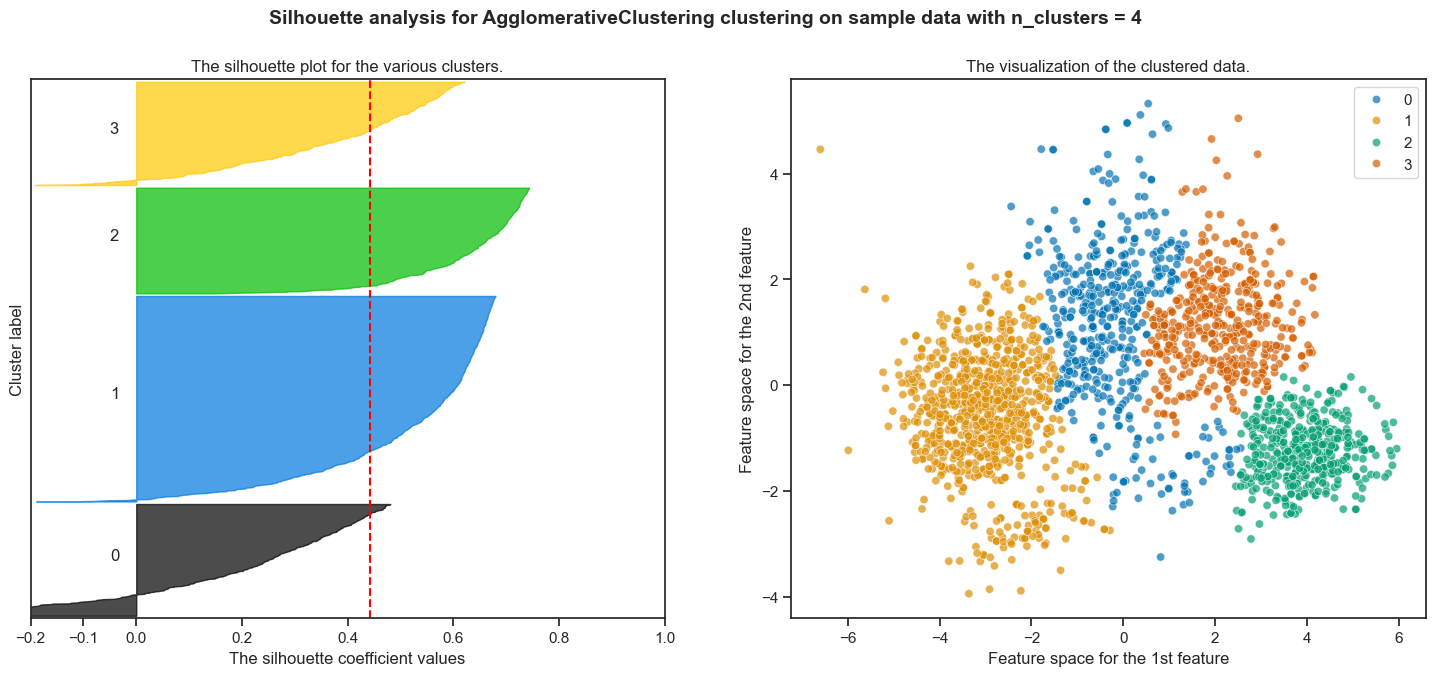

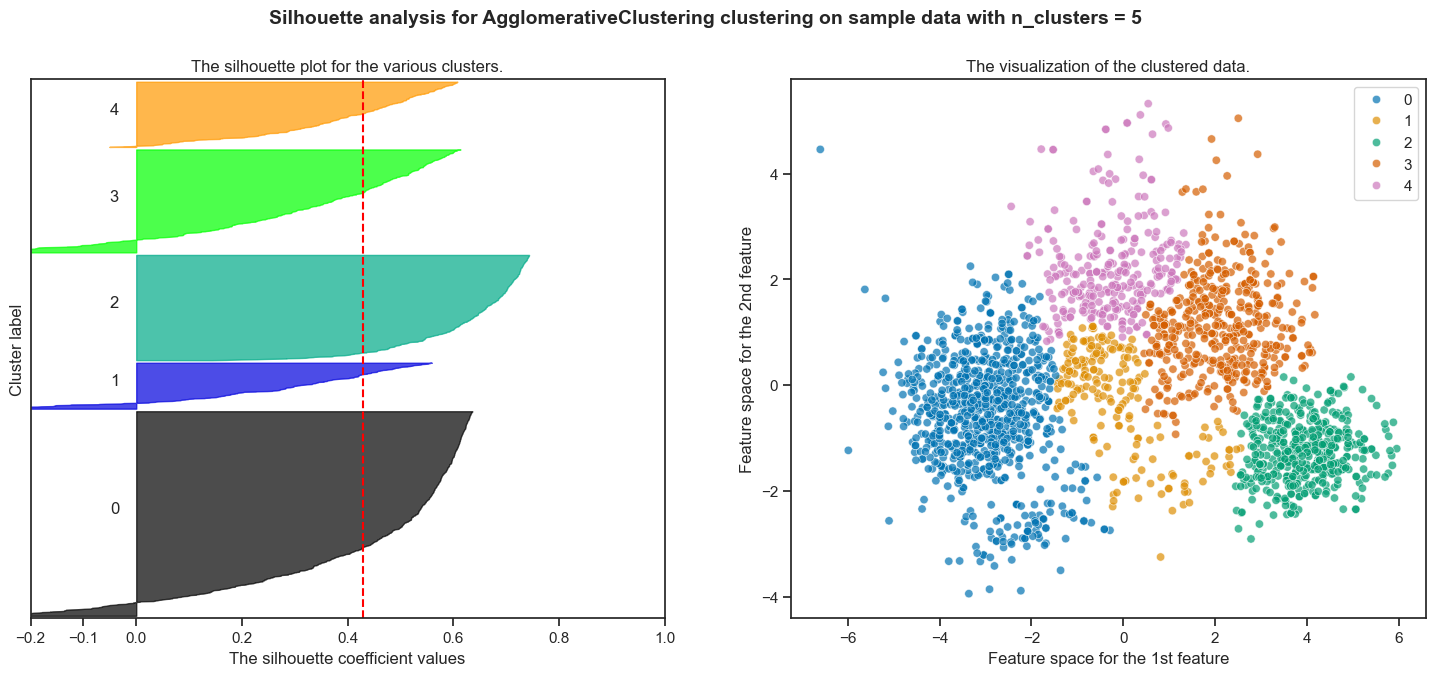

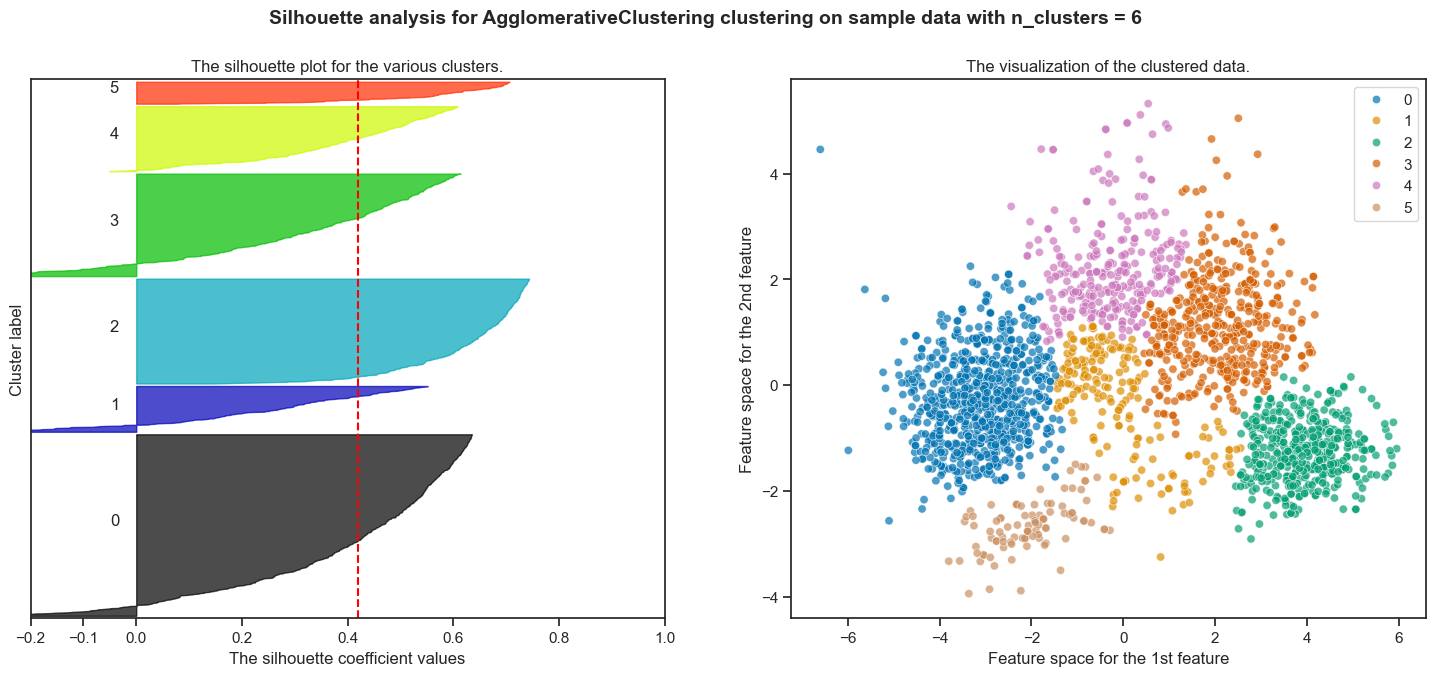

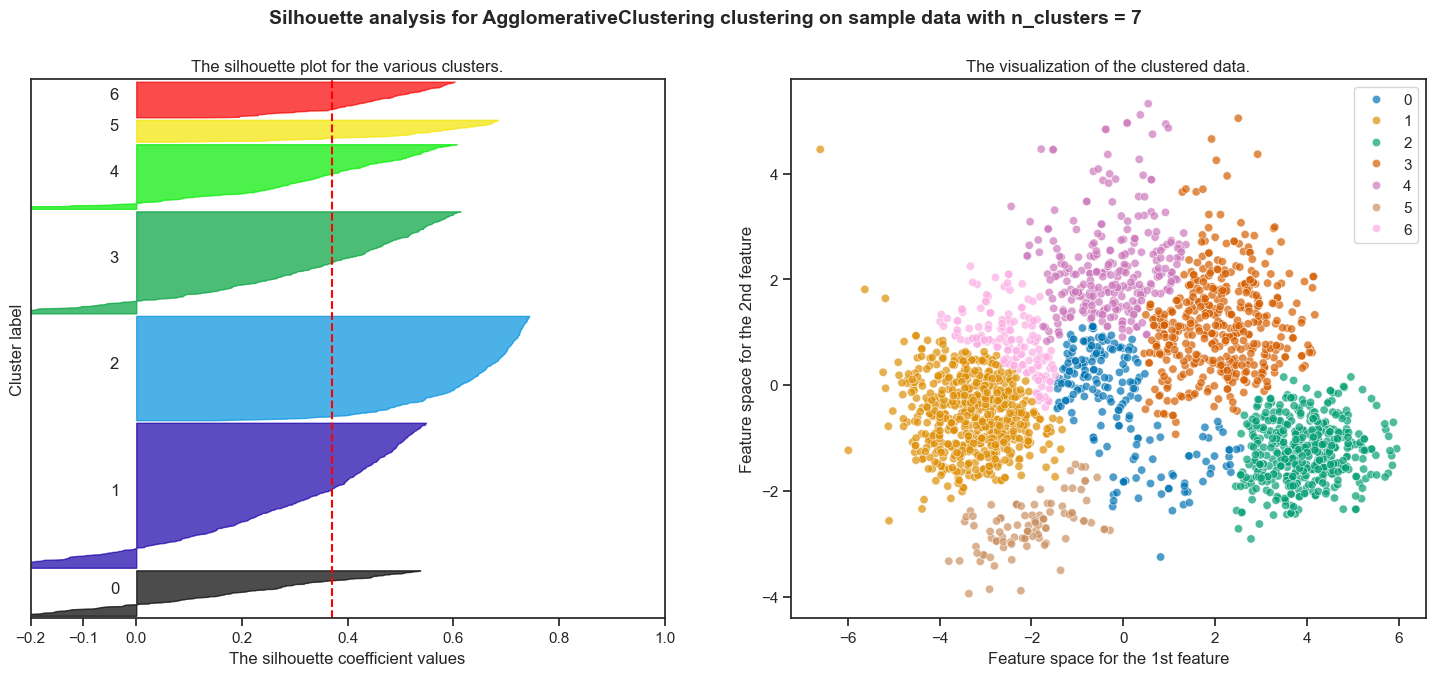

In [46]:
#Silhoutte Score Plot for Agglomerative Clustering to choose best number of clusters
#We will go with the n_clusters range of 3-7 to find the best cluster for Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
#Plot Score to choose best clusters
silhouette_plot(AgglomerativeClustering,range(3,8),pcadf,reduced)

In [ ]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(reduced)
model_label = model.labels_
plt.figure(figsize=(13,9))

sns.set_style('white')
plt.title('Agglomerative Clustering', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=100, cmap='Paired', ec='k')

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'